In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [205]:
df = pd.read_csv("/content/Diwali Sales Data.csv", encoding = "unicode_escape")

In [206]:
df.shape

(11251, 15)

In [207]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


# **Data Cleaning and Preparing for Analysis**

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [209]:
df.drop(["Status","unnamed1"], axis = 1, inplace = True)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [211]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [212]:
df.dropna(inplace = True)

In [213]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [214]:
df["Amount"] = df["Amount"].astype("int")

In [215]:
df["Amount"].dtypes

dtype('int64')

In [216]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [217]:
df.rename(columns = {"Cust_name" : "Customer_Name", "Marital_status" : "Relationship_status"}, inplace = True)

In [218]:
df.columns

Index(['User_ID', 'Customer_Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [219]:
df[["Orders","Amount"]].describe()

,Orders,Amount
count,11239.000000,11239.000000
mean,2.489634,9453.610553
std,1.114967,5222.355168
min,1.000000,188.000000
25%,2.000000,5443.000000
50%,2.000000,8109.000000
75%,3.000000,12675.000000
max,4.000000,23952.000000


# **Exploratory Data Analysis EDA**


Based On Gender


In [220]:
df.head()

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


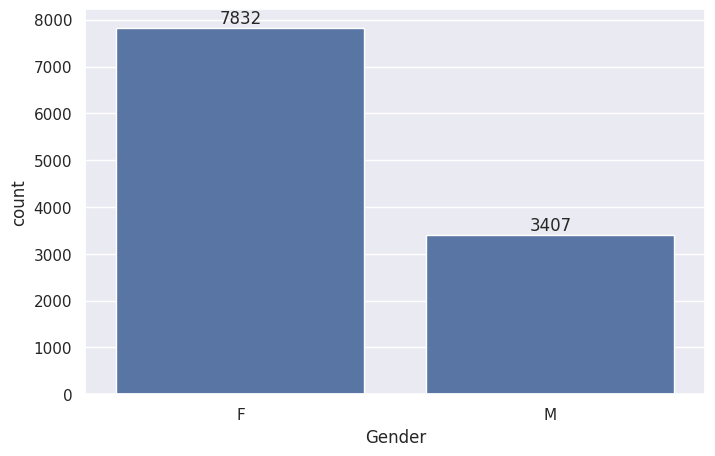

In [221]:
x = sns.countplot(x = "Gender", data = df)
for y in x.containers:
  x.bar_label(y)


  Gender    Amount
0      F  74335853
1      M  31913276


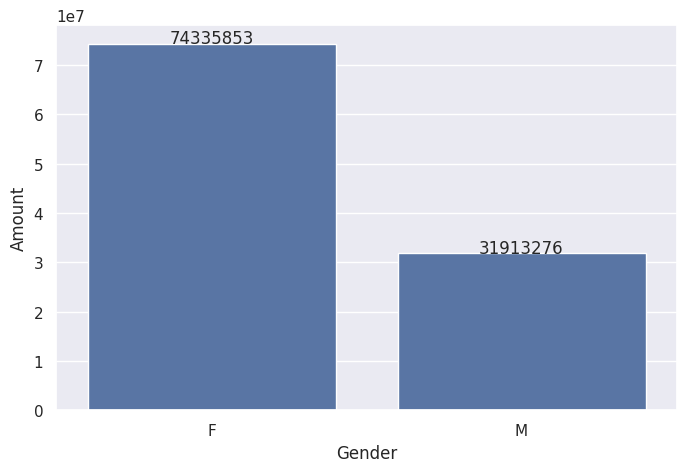

In [222]:
sales_gen = df.groupby(["Gender"],as_index =False)["Amount"].sum().sort_values(by = "Amount",ascending =False)
print(sales_gen)

x = sns.barplot(x = "Gender", y = "Amount", data = sales_gen)

for index, row in sales_gen.iterrows():
  x.text(index, row["Amount"], row["Amount"], ha  = "center")

  Gender    Amount
0      F  74335853
1      M  31913276


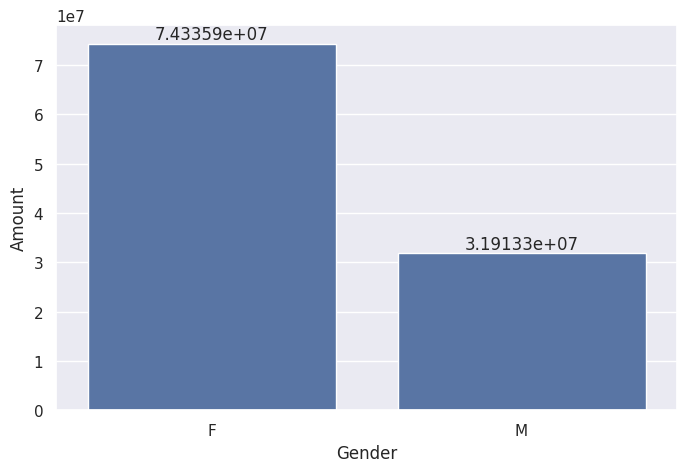

In [223]:
sales_gen = df.groupby("Gender")["Amount"].sum().reset_index().sort_values(by="Amount", ascending=False)
print(sales_gen)

x = sns.barplot(x="Gender", y="Amount", data=sales_gen)
for y in x.containers:
    x.bar_label(y)

# **Based On Age**

In [224]:
df.head()

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


Axes(0.125,0.11;0.775x0.77)


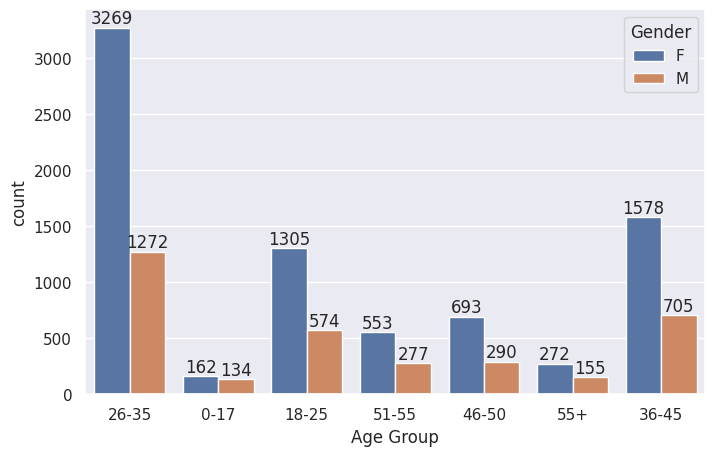

In [225]:
x = sns.countplot(x = "Age Group", data = df, hue = "Gender")
print(x)
for y in x.containers:
  x.bar_label(y)



  Age Group    Amount
2     26-35  42613442
3     36-45  22144994
1     18-25  17240732
4     46-50   9207844
5     51-55   8261477
6       55+   4080987
0      0-17   2699653


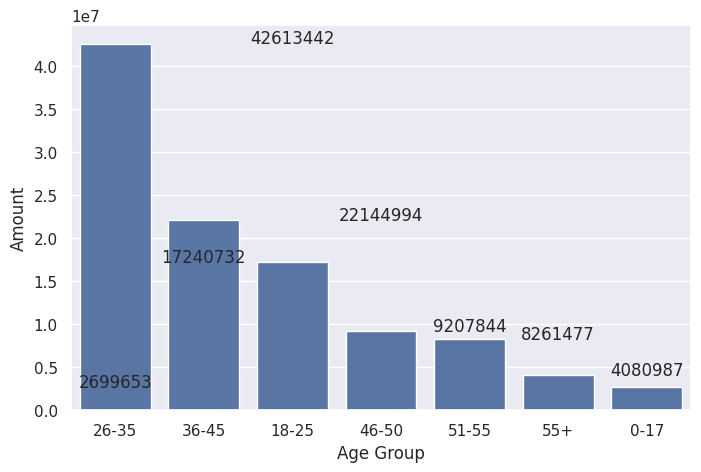

In [226]:
sales_age = df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by = "Amount", ascending = False)
print(sales_age)

x = sns.barplot(x = "Age Group", y = "Amount", data = sales_age )

for index, row in sales_age.iterrows():
  x.text(index, row["Amount"], row["Amount"],ha  = "center")


# **Based on States**

In [227]:
df.head()

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


               State    Amount
14     Uttar Pradesh  19374968
10       Maharashtra  14427543
7          Karnataka  13523540
2              Delhi  11603818
9     Madhya Pradesh   8101142
0     Andhra Pradesh   8037146
5   Himachal Pradesh   4963368
4            Haryana   4220175
1              Bihar   4022757
3            Gujarat   3946082
8             Kerala   3894491
6          Jharkhand   3026456
15       Uttarakhand   2520944
12         Rajasthan   1909409
11            Punjab   1525800
13         Telangana   1151490


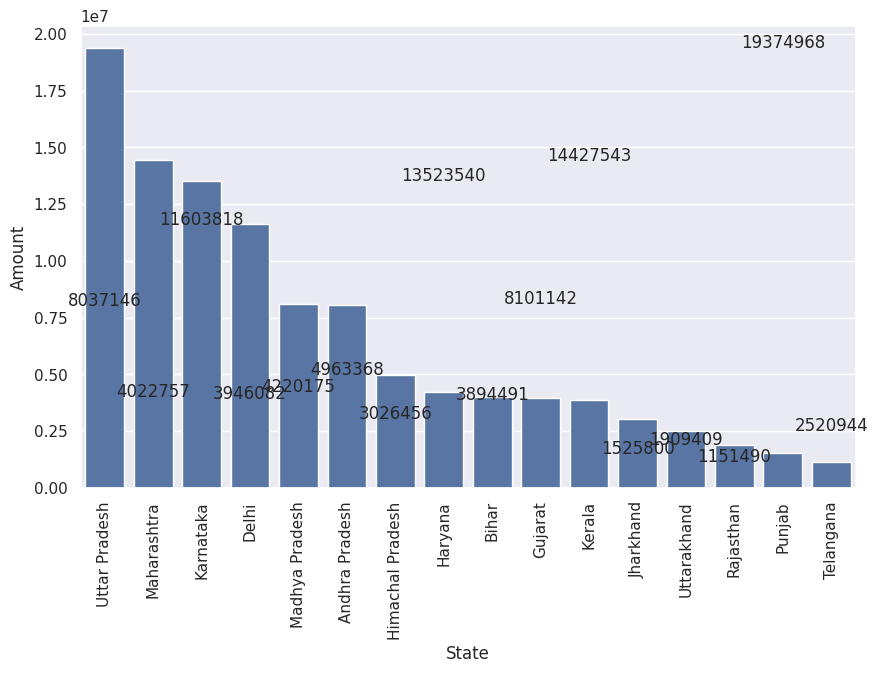

In [228]:
sales_states= df.groupby(["State"],as_index = False)["Amount"].sum().sort_values(by  = "Amount", ascending = False)
print(sales_states)

plt.figure(figsize = (10,6))
x = sns.barplot(x= "State", y = "Amount", data = sales_states )

for index, row in sales_states.iterrows():
  x.text(index,row["Amount"], row["Amount"],  ha = "center")

plt.xticks(rotation = 90)
plt.show()




               State  Orders
14     Uttar Pradesh    4807
10       Maharashtra    3810
7          Karnataka    3240
2              Delhi    2740
9     Madhya Pradesh    2252
0     Andhra Pradesh    2051
5   Himachal Pradesh    1568
8             Kerala    1137
4            Haryana    1109
3            Gujarat    1066
1              Bihar    1062
6          Jharkhand     953
15       Uttarakhand     824
12         Rajasthan     555
11            Punjab     495
13         Telangana     312


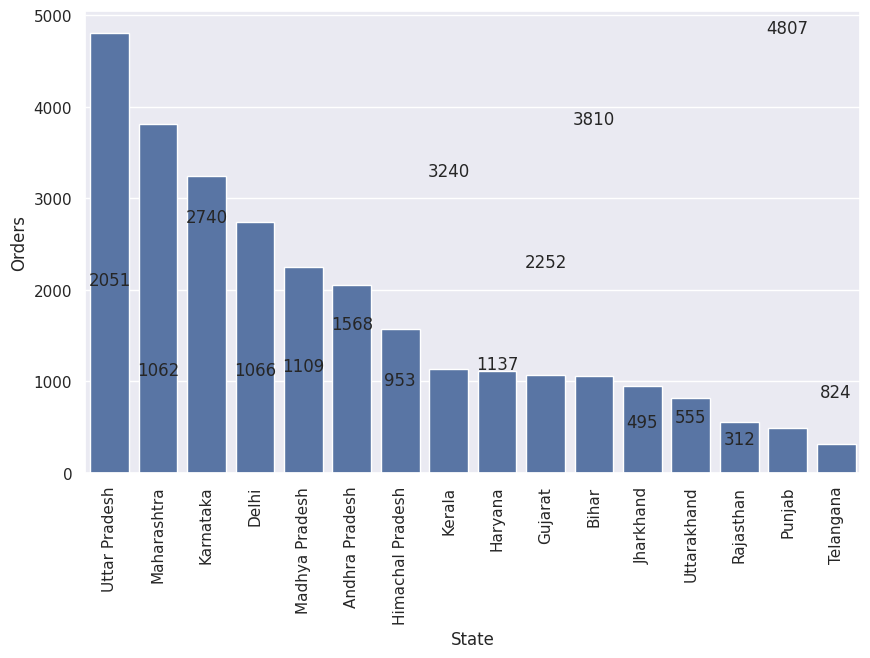

In [233]:
sales_states= df.groupby(["State"],as_index = False)["Orders"].sum().sort_values(by  = "Orders", ascending = False)
print(sales_states)

plt.figure(figsize = (10,6))
x = sns.barplot(x= "State", y = "Orders", data = sales_states )

for index, row in sales_states.iterrows():
  x.text(index,row["Orders"], row["Orders"],  ha = "center")

plt.xticks(rotation = 90)
plt.show()

# **Based on Marital Status**

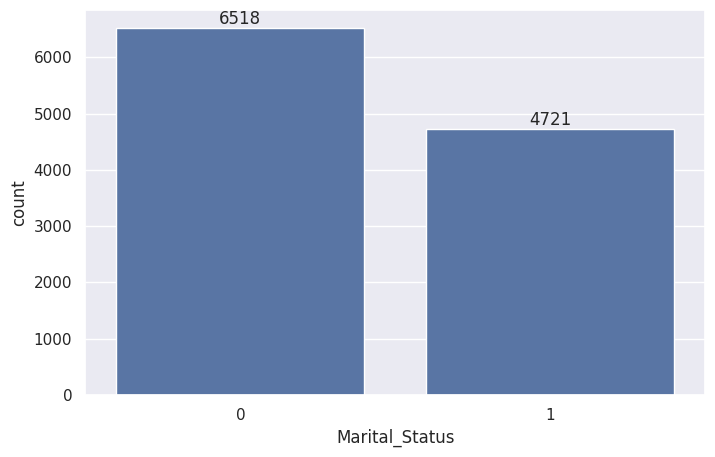

In [235]:
x = sns.countplot(x = "Marital_Status", data = df)
for y in x.containers:
  x.bar_label(y)


   Marital_Status Gender    Amount
0               0      F  43786646
2               1      F  30549207
1               0      M  18338738
3               1      M  13574538
Axes(0.125,0.11;0.775x0.77)


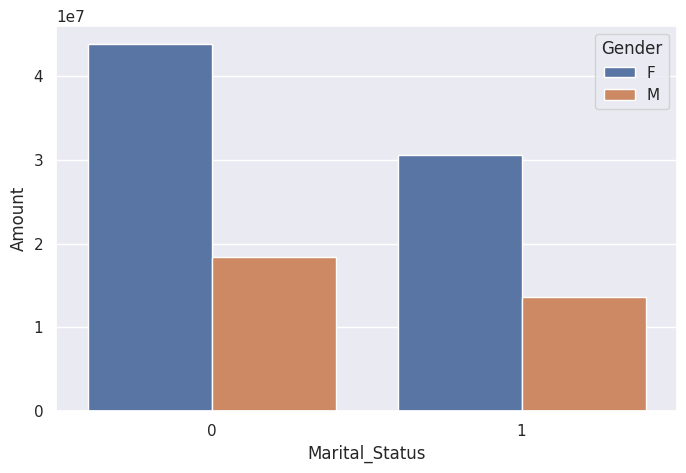

In [246]:
sales_Marital_Gender = df.groupby(["Marital_Status", "Gender"])["Amount"].sum().reset_index().sort_values(by = "Amount", ascending = False)
print(sales_Marital_Gender)
x = sns.barplot(x = "Marital_Status", y = "Amount", data = sales_Marital_Gender, hue = "Gender")
print(x)



# **Based On Occupation**

In [247]:
df.head()

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


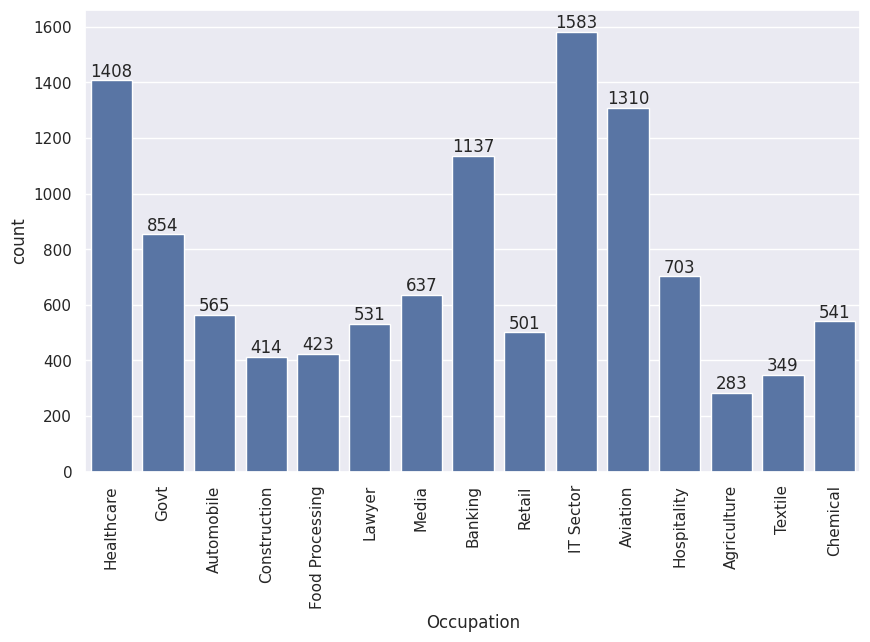

In [249]:
plt.figure(figsize = (10,6))
x = sns.countplot(x = "Occupation", data = df)
for y in x.containers:
  x.bar_label(y)

plt.xticks(rotation = 90)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'IT Sector'),
  Text(1, 0, 'Healthcare'),
  Text(2, 0, 'Aviation'),
  Text(3, 0, 'Banking'),
  Text(4, 0, 'Govt'),
  Text(5, 0, 'Hospitality'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Automobile'),
  Text(8, 0, 'Chemical'),
  Text(9, 0, 'Lawyer'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Food Processing'),
  Text(12, 0, 'Construction'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Agriculture')])

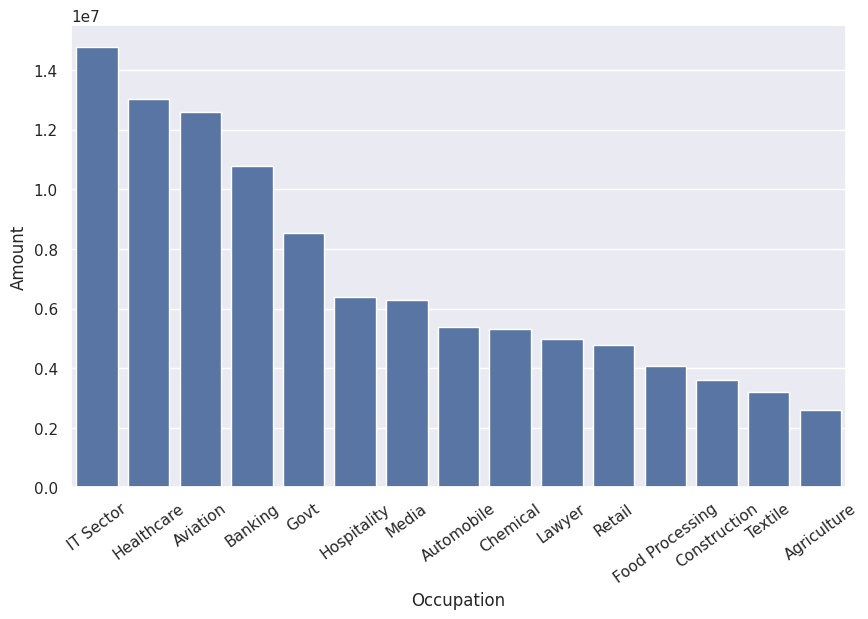

In [254]:
sales_Occ = df.groupby("Occupation")["Amount"].sum().reset_index().sort_values(by = "Amount", ascending = False)
sales_Occ
plt.figure(figsize = (10,6))
x = sns.barplot(x = "Occupation", y = "Amount", data  = sales_Occ)
plt.xticks(rotation = 36)

In [257]:
sales_Occ.value_counts

<bound method DataFrame.value_counts of          Occupation    Amount
10        IT Sector  14755079
8        Healthcare  13034586
2          Aviation  12602298
3           Banking  10770610
7              Govt   8517212
9       Hospitality   6376405
12            Media   6295832
1        Automobile   5368596
4          Chemical   5297436
11           Lawyer   4981665
13           Retail   4783170
6   Food Processing   4070670
5      Construction   3597511
14          Textile   3204972
0       Agriculture   2593087>

# **Based On Product Category**

In [258]:
df.head()

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

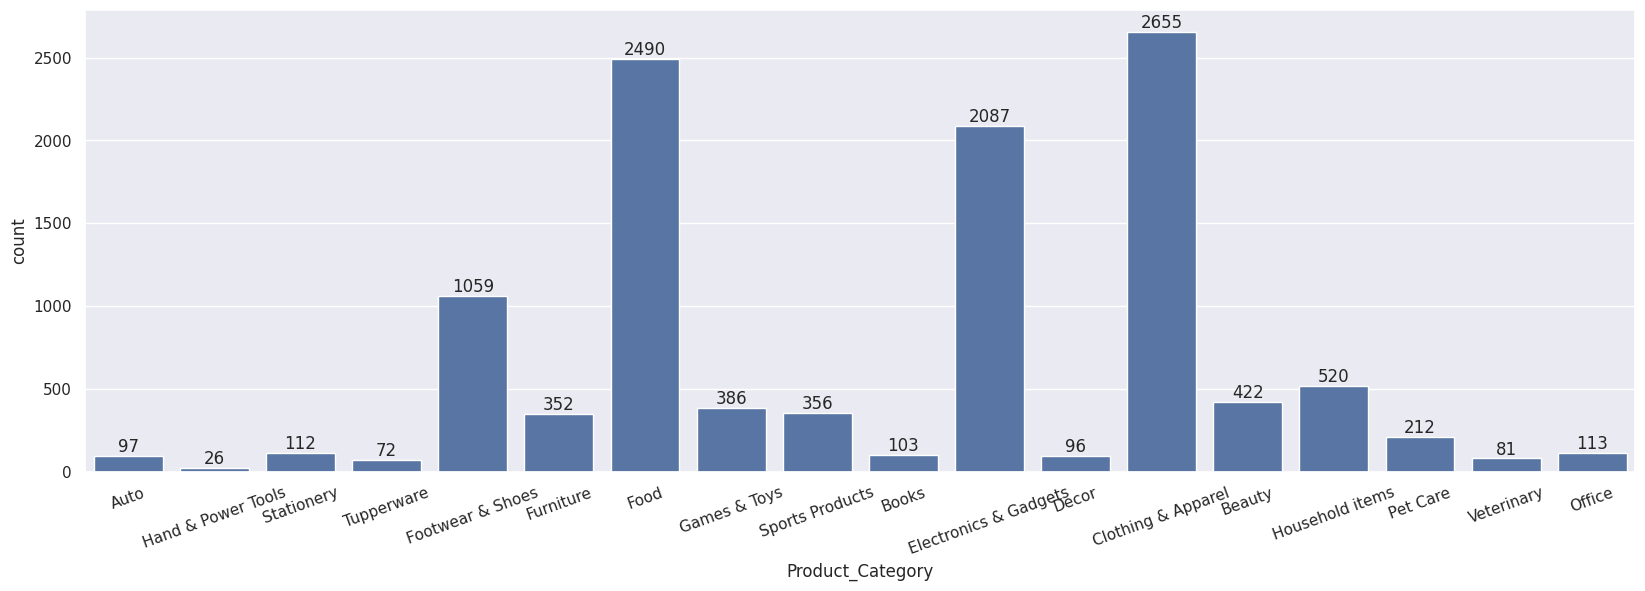

In [262]:
plt.figure(figsize = (20,6))
x = sns.countplot(x = "Product_Category", data = df)
for y in x.containers:
  x.bar_label(y)
plt.xticks(rotation = 20)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Auto'),
  Text(9, 0, 'Stationery'),
  Text(10, 0, 'Household items'),
  Text(11, 0, 'Tupperware'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Decor'),
  Text(14, 0, 'Pet Care'),
  Text(15, 0, 'Hand & Power Tools'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

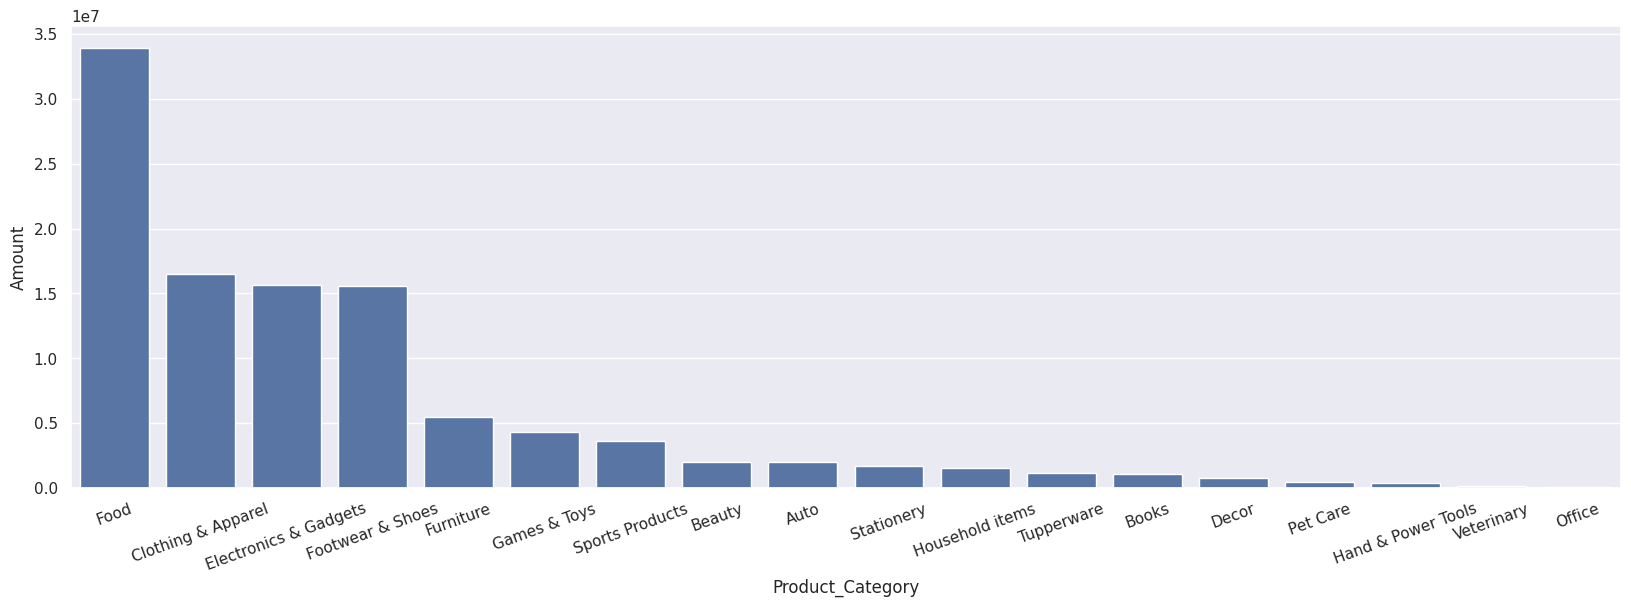

In [268]:
sales_Pro_Cat = df.groupby(["Product_Category"])["Amount"].sum().reset_index().sort_values(by = "Amount", ascending = False)
sales_Pro_Cat

plt.figure(figsize = (20,6))
x = sns.barplot(x = "Product_Category", y = "Amount", data = sales_Pro_Cat)
plt.xticks(rotation = 20)

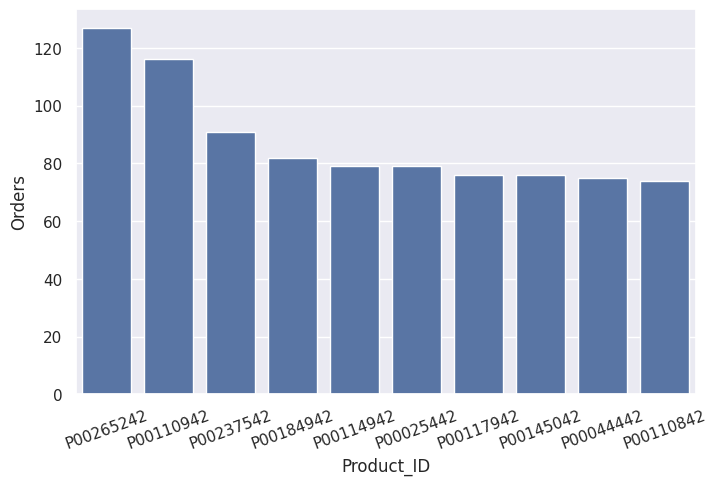

In [273]:
# Checking the top 10 soled products based on Product_ID
Grouped_Product = df.groupby("Product_ID")["Orders"].sum().reset_index().sort_values(by = "Orders", ascending = False).head(10)
Grouped_Product
sns.barplot(x = "Product_ID", y = "Orders", data =Grouped_Product )
plt.xticks(rotation = 20)
plt.show()

# **Conclusion**

According to the analyzed data it can be determined that Female individuals who are married and aged between 26 and 35 years and who work within the Information Technology, Healthcare, and Aviation sectors in the states of Uttar Pradesh, Maharashtra, and Karnataka, have a higher propensity to purchase products from the categories of Food, Clothing, and Electronics.

# **Project Learnings**

1. Executed data cleaning and manipulation procedures.
2. Conducted exploratory data analysis (EDA) utilizing the pandas, matplotlib, and seaborn libraries.
3. Enhanced the customer experience by identifying prospective customers among diverse states, occupations, genders, and age groups.
4. Boosted sales by identifying the highest selling product categories and products, thereby facilitating inventory planning to meet demand.